In [604]:
import algorithm as al
import numpy as np
import pandas as pd

In [605]:
# train = pd.read_excel('../archive/Raisin_Dataset.xlsx')
train = pd.read_csv('../../GR1/Algerian_forest_fires_dataset_UPDATE.csv')
train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [606]:
train = train.to_numpy()
R_train = train[:, 0:-1]
R_train
# R_train = np.random.rand(100, 10)

array([[29. , 57. , 18. , ...,  1.3,  3.4,  0.5],
       [29. , 61. , 13. , ...,  1. ,  3.9,  0.4],
       [26. , 82. , 22. , ...,  0.3,  2.7,  0.1],
       ...,
       [27. , 87. , 29. , ...,  0.4,  3.4,  0.2],
       [24. , 54. , 18. , ...,  1.7,  5.1,  0.7],
       [24. , 64. , 15. , ...,  1.2,  4.8,  0.5]])

In [607]:
Nd = al.normalization(R_train, 0, 1)
Nd

array([[0.35      , 0.52173913, 0.52173913, ..., 0.06842105, 0.03437967,
        0.01607717],
       [0.35      , 0.57971014, 0.30434783, ..., 0.05263158, 0.04185351,
        0.01286174],
       [0.2       , 0.88405797, 0.69565217, ..., 0.01578947, 0.02391629,
        0.00321543],
       ...,
       [0.25      , 0.95652174, 1.        , ..., 0.02105263, 0.03437967,
        0.00643087],
       [0.1       , 0.47826087, 0.52173913, ..., 0.08947368, 0.05979073,
        0.02250804],
       [0.1       , 0.62318841, 0.39130435, ..., 0.06315789, 0.05530643,
        0.01607717]])

In [608]:
dis = al.distance(Nd)
dis

array([[0.        , 0.2396043 , 0.93351308, ..., 0.7192331 , 0.33190264,
        0.30455123],
       [0.2396043 , 0.        , 0.91096014, ..., 0.84540361, 0.42394814,
        0.28310997],
       [0.93351308, 0.91096014, 0.        , ..., 0.8146118 , 1.02319802,
        0.92511498],
       ...,
       [0.7192331 , 0.84540361, 0.8146118 , ..., 0.        , 0.85960746,
        0.78051196],
       [0.33190264, 0.42394814, 1.02319802, ..., 0.85960746, 0.        ,
        0.26972169],
       [0.30455123, 0.28310997, 0.92511498, ..., 0.78051196, 0.26972169,
        0.        ]])

In [609]:
prod = al.product(dis,Nd)
prod

array([[ 96.17262101,  94.33836447,  71.95260117, ...,  59.08213284,
         57.66820331,  59.42170948],
       [ 95.83376397,  92.69628243,  72.59429977, ...,  59.8749093 ,
         58.00918793,  60.17677225],
       [162.50459409, 162.60212318, 120.64260284, ...,  91.50762489,
         85.61041934,  87.36686631],
       ...,
       [148.76632472, 145.48900488, 108.52832638, ...,  84.69533642,
         79.24663321,  81.30347694],
       [104.88372614, 106.52652058,  79.22826852, ...,  60.82260144,
         59.22428323,  60.38342777],
       [106.28957883, 101.27339549,  78.35971588, ...,  63.77604432,
         61.08015701,  63.28518682]])

In [610]:
M = al.membershipValue(prod)
M

array([[0.01039797, 0.01060014, 0.01389804, ..., 0.01692559, 0.01734058,
        0.01682887],
       [0.01043474, 0.01078792, 0.01377519, ..., 0.01670149, 0.01723865,
        0.01661771],
       [0.00615367, 0.00614998, 0.00828895, ..., 0.01092805, 0.01168082,
        0.01144599],
       ...,
       [0.00672195, 0.00687337, 0.00921418, ..., 0.01180703, 0.01261883,
        0.0122996 ],
       [0.00953437, 0.00938733, 0.01262176, ..., 0.01644126, 0.01688497,
        0.01656084],
       [0.00940826, 0.00987426, 0.01276166, ..., 0.01567987, 0.01637193,
        0.01580149]])

In [611]:
N = al.nonMembershipValue(M, 0.45)
N

array([[0.73735792, 0.73526392, 0.70419541, ..., 0.67962696, 0.67648911,
        0.68036554],
       [0.73697522, 0.73334148, 0.70526257, ..., 0.68134245, 0.67725524,
        0.68198764],
       [0.78894469, 0.78899797, 0.76091303, ..., 0.73192058, 0.72447875,
        0.72676678],
       ...,
       [0.78096403, 0.77890801, 0.75016529, ..., 0.72326118, 0.71562079,
        0.71858679],
       [0.7466039 , 0.74822989, 0.71559384, ..., 0.68335348, 0.67993683,
        0.68242683],
       [0.74799751, 0.74290444, 0.71430931, ..., 0.68935931, 0.68389273,
        0.68838744]])

In [612]:
H = al.hesitancyValue(N, 0.45)
H

array([[0.25224411, 0.25413594, 0.28190655, ..., 0.30344745, 0.30617031,
        0.30280559],
       [0.25259005, 0.2558706 , 0.28096224, ..., 0.30195606, 0.30550611,
        0.30139465],
       [0.20490164, 0.20485205, 0.23079802, ..., 0.25715137, 0.26384043,
        0.26178724],
       ...,
       [0.21231402, 0.21421861, 0.24062053, ..., 0.26493179, 0.27176038,
        0.26911361],
       [0.24386173, 0.24238277, 0.27178441, ..., 0.30020527, 0.30317821,
        0.30101234],
       [0.24259423, 0.2472213 , 0.27292903, ..., 0.29496082, 0.29973534,
        0.29581108]])

In [613]:
M, N, H = al.method1(R_train, 0.45)

M = np.around(M, 3)
N = np.around(N, 3)
H = np.around(H, 3)

print ("M = ",M)
print ("\nN = ",N)
print ("\nH = ",H)

M =  [[0.01  0.011 0.014 ... 0.017 0.017 0.017]
 [0.01  0.011 0.014 ... 0.017 0.017 0.017]
 [0.006 0.006 0.008 ... 0.011 0.012 0.011]
 ...
 [0.007 0.007 0.009 ... 0.012 0.013 0.012]
 [0.01  0.009 0.013 ... 0.016 0.017 0.017]
 [0.009 0.01  0.013 ... 0.016 0.016 0.016]]

N =  [[0.737 0.735 0.704 ... 0.68  0.676 0.68 ]
 [0.737 0.733 0.705 ... 0.681 0.677 0.682]
 [0.789 0.789 0.761 ... 0.732 0.724 0.727]
 ...
 [0.781 0.779 0.75  ... 0.723 0.716 0.719]
 [0.747 0.748 0.716 ... 0.683 0.68  0.682]
 [0.748 0.743 0.714 ... 0.689 0.684 0.688]]

H =  [[0.252 0.254 0.282 ... 0.303 0.306 0.303]
 [0.253 0.256 0.281 ... 0.302 0.306 0.301]
 [0.205 0.205 0.231 ... 0.257 0.264 0.262]
 ...
 [0.212 0.214 0.241 ... 0.265 0.272 0.269]
 [0.244 0.242 0.272 ... 0.3   0.303 0.301]
 [0.243 0.247 0.273 ... 0.295 0.3   0.296]]


In [614]:
U, S = al.method3(R_train, 2, 1.7, 0.45,'mahanta_panda_distance')

Initial centroids:
[[[8.72808105e-01 1.88270732e-03 1.25309188e-01]
  [6.01636058e-01 2.93554049e-02 3.69008537e-01]
  [2.97296230e-01 1.45977642e-01 5.56726128e-01]
  [6.96407145e-01 1.48160725e-02 2.88776783e-01]
  [8.53037752e-01 2.63077288e-03 1.44331475e-01]
  [9.94948683e-02 3.78691804e-01 5.21813328e-01]
  [5.85550565e-01 3.25223645e-02 3.81927071e-01]
  [6.32428637e-01 2.38967802e-02 3.43674583e-01]
  [1.36296481e-01 3.12079879e-01 5.51623641e-01]
  [7.79904137e-01 6.79975058e-03 2.13296113e-01]]

 [[9.54946936e-01 1.77747779e-04 4.48753158e-02]
  [4.76564872e-01 6.07848498e-02 4.62650278e-01]
  [2.63359212e-01 1.70758857e-01 5.65881930e-01]
  [3.53927938e-01 1.11994541e-01 5.34077521e-01]
  [2.29497853e-01 1.99693986e-01 5.70808161e-01]
  [6.88374089e-01 1.58031606e-02 2.95822750e-01]
  [3.57958647e-01 1.09871775e-01 5.32169578e-01]
  [9.34166154e-02 3.91710580e-01 5.14872804e-01]
  [7.30551016e-01 1.10642052e-02 2.58384779e-01]
  [2.36372587e-01 1.93432168e-01 5.70195244e-01]

In [615]:
X = np.dstack((M,N,H))
P = X.shape[0]
y = np.empty(P, dtype = object)
for i in range(P):
    if al.mahanta_panda_distance(X[i], S[0]) < al.mahanta_panda_distance(X[i], S[1]): y[i] = 1
    else: y[i] = 0

print(np.sum(y == train[:,-1])/P)

0.8688524590163934


In [616]:
from sklearn.decomposition import PCA

In [617]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(M))
centroids = pd.DataFrame(pca.fit_transform(S[:,:,0]))

In [618]:
import matplotlib.pyplot as plt

In [619]:
label = train[:,-1]

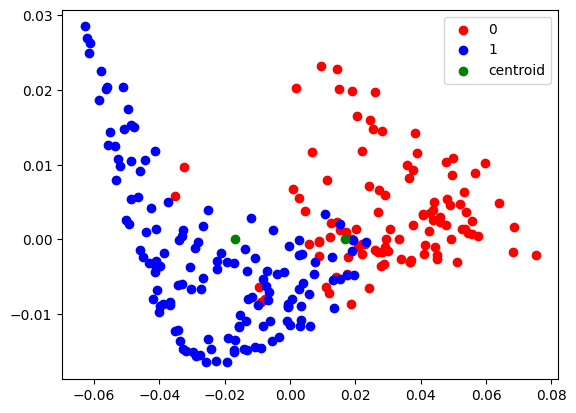

In [620]:
plt.scatter(transformed[label==0][0], transformed[label==0][1], label=0, c='red')
plt.scatter(transformed[label==1][0], transformed[label==1][1], label=1, c='blue')
plt.scatter(centroids[0], centroids[1], label='centroid', c='green')
plt.legend()
plt.show()

In [621]:
test1 = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [622]:
test2 = S.reshape(S.shape[0], S.shape[1]*S.shape[2])

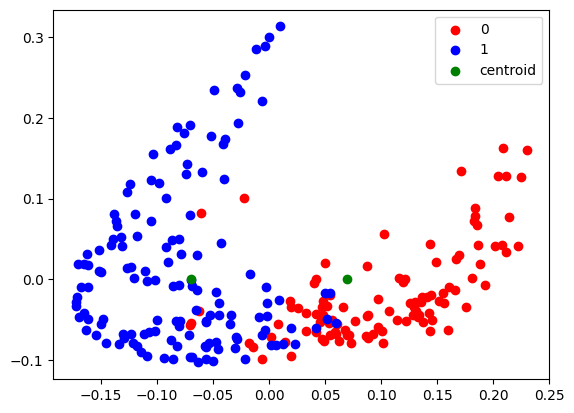

In [623]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(test1))
centroids = pd.DataFrame(pca.fit_transform(test2))
plt.scatter(transformed[label==0][0], transformed[label==0][1], label=0, c='red')
plt.scatter(transformed[label==1][0], transformed[label==1][1], label=1, c='blue')
plt.scatter(centroids[0], centroids[1], label='centroid', c='green')
plt.legend()
plt.show()

In [624]:
true_labels = train[:, -1]
CA = al.calculate_CA(true_labels, y)
PC = al.calculate_PC(U)
# SC = al.calculate_SC(R_train, U, S)
# XB = al.calculate_XB(R_train, U, S) 
# DI = al.calculate_DI(R_train, U, S)  

# Print the evaluation metrics
print(f'Clustering Accuracy (CA): {CA}')
print(f'Partition Coefficient (PC): {PC}')
# print(f'Partition Index (SC): {SC}')
# print(f'Xie-Beni Index (XB): {XB}')
# print(f'Dunn Index (DI): {DI}')

Clustering Accuracy (CA): 0.8688524590163934
Partition Coefficient (PC): 0.6343004355761137
